In [ ]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob

  0%|          | 0/100 [00:00<?, ?it/s]

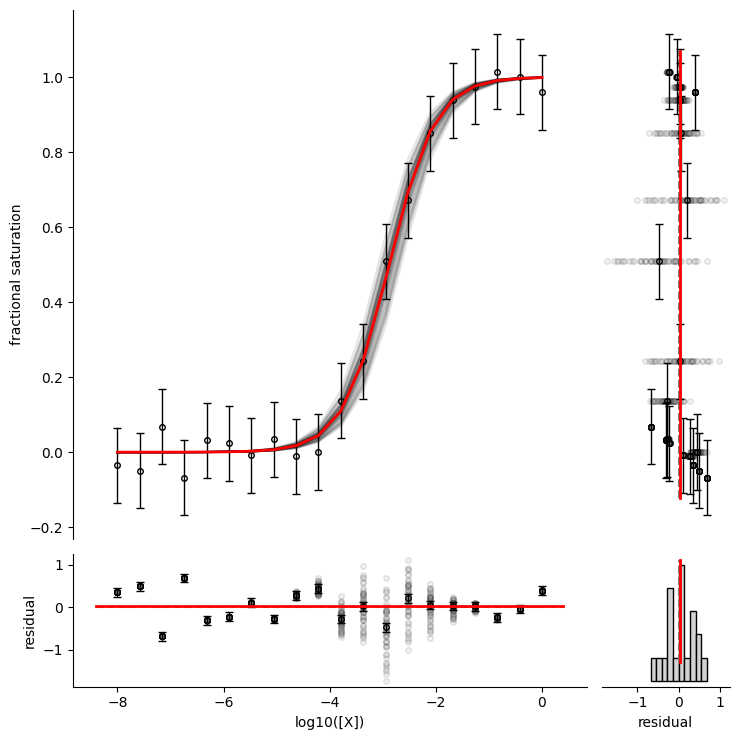

In [1]:
%matplotlib inline
import numpy as np
import dataprob

def binding_curve(K=1,x=None): 
    return x/(K + x)

gen_params = {"K":1e-3}

err = 0.05
num_points = 20
x = 10**(np.linspace(-8,0,num_points))
y_obs = binding_curve(x=x,**gen_params) + np.random.normal(0,err,num_points)
y_std = err*2

non_fit_kwargs = {"x":x}

f = dataprob.setup(some_function=binding_curve,
                   method="bootstrap",
                   non_fit_kwargs=non_fit_kwargs)

f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f,
                            x_axis=np.log10(x),
                            x_label="log10([X])",
                            y_label="fractional saturation")

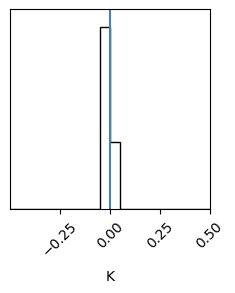

In [2]:
fig = dataprob.plot_corner(f)

In [3]:
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
K,K,0.00132,0.000322,0.000725,0.002075,1.0,False,-inf,inf,NaN,NaN
